## 202 - GeoJSON from the SPC

[Youtube](https://www.youtube.com/watch?v=s3WZiaJCwhw)

In [1]:
import matplotlib.pyplot as plt
import geopandas
from pyproj import CRS
from cartopy import crs as ccrs
import cartopy.feature as cfeature

In [2]:
gdf = geopandas.read_file('https://www.spc.noaa.gov/products/outlook/day1otlk_cat.nolyr.geojson')
gdf

,DN,VALID,EXPIRE,ISSUE,LABEL,LABEL2,stroke,fill,geometry
0,2,202401081630,202401091200,202401081628,TSTM,General Thunderstorms Risk,#55BB55,#C1E9C1,"MULTIPOLYGON (((-84.39003 29.48689, -84.09000 ..."
1,3,202401081630,202401091200,202401081628,MRGL,Marginal Risk,#005500,#66A366,"POLYGON ((-85.16904 29.28827, -84.82000 29.870..."
2,4,202401081630,202401091200,202401081628,SLGT,Slight Risk,#DDAA00,#FFE066,"POLYGON ((-85.52595 29.39159, -85.32000 29.720..."
3,5,202401081630,202401091200,202401081628,ENH,Enhanced Risk,#FF6600,#FFA366,"POLYGON ((-94.55077 29.03088, -95.16000 29.350..."


In [3]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
map_crs = ccrs.LambertConformal(central_latitude = 35, central_longitude = -100, standard_parallels = (30, 60))

data_crs = ccrs.PlateCarree()

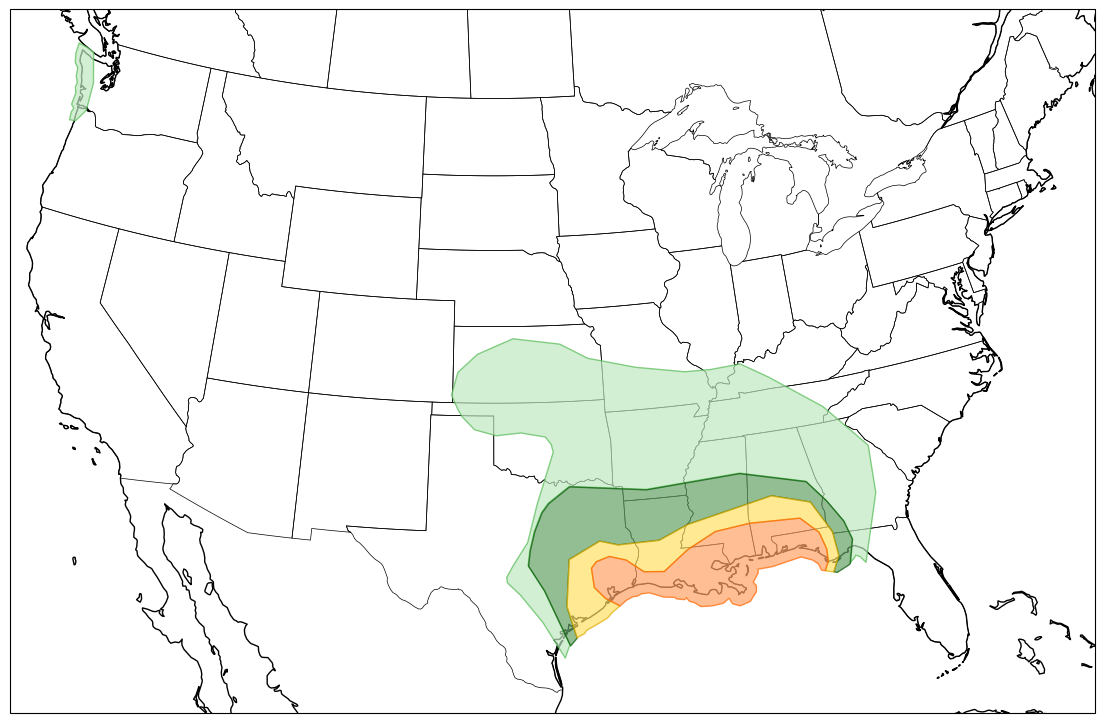

In [5]:
fig = plt.figure(figsize = (14, 12))
ax = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-120, -75, 25, 50], data_crs)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth = 0.5)

for _, row in gdf.iterrows():
	if row['geometry'].geom_type == 'Polygon':
		row['geometry'] = [row['geometry']]
		
	ax.add_geometries(row['geometry'], crs = data_crs, facecolor = row['fill'], edgecolor = row['stroke'], alpha = 0.7)